# 판다스심화

## 데이터프레임 정렬

In [ ]:
import numpy as np
import pandas as pd
print("DataFrame: ")
data = {"col1":[2,1,9,8,7,4],
        "col2":['A','A','B',np.nan,'D','C'],
        "col3":[0,1,9,4,2,3]
}
index = [1,3,2,5,0,4]
df = pd.DataFrame(data,index)
df

In [ ]:
df = df.sort_index(axis=0)
#axis는 열행을 나타낸다 0행 1열
df

In [ ]:
df = df.sort_index(axis=1 , ascending =False)
#ascending는 오름차순을 나타낸다. 1행을 내림차순으로 나열이란 뜻 ↑
#descending은 내림차순을 나타낸다.
df

In [ ]:
#sort_value
sorted_df1 = df.sort_values("col1", ascending = 1)
sorted_df1

In [ ]:
#sorted_values 2
sorted_df2 = df.sort_values(['col2','col1'],ascending = [1,0])
sorted_df2

## 데이터분석용 함수

In [ ]:
import numpy as np
import pandas as pd
data ={
    "korean":[50,60,70,30],
    "math":[30,np.nan,40,20]
}
df = pd.DataFrame(data, index = ['a','b','c','d'])
print(df.index)
print(df.columns)
df

In [ ]:
# count()함수
print(df.count(axis=0)) #axis = 0 기본값(생략가능)
print(df.count(axis=1))

In [54]:
# max().min().sum().mean()

print(df.max())
print(df.max(axis=1))
print("="*20)
print(df.min())
print(df.min(axis=1))
print("="*20)
print(df.sum())
print(df.sum(axis=1))
print("="*20)
print(df.mean())
print(df.mean(axis=1,skipna=False))
#skipna는 NaN값을 포함할지 말지 고르는 기능이다. True는 빼고 False는 넣고이다.

korean    70.0
math      40.0
dtype: float64
a    50.0
b    60.0
c    70.0
d    30.0
dtype: float64
korean    30.0
math      20.0
dtype: float64
a    30.0
b    60.0
c    40.0
d    20.0
dtype: float64
korean    210.0
math       90.0
dtype: float64
a     80.0
b     60.0
c    110.0
d     50.0
dtype: float64
korean    52.5
math      30.0
dtype: float64
a    40.0
b     NaN
c    55.0
d    25.0
dtype: float64


In [57]:
#결측값 대체 fillna
avg = df["math"].mean()
df["math"]=df["math"].fillna(avg)
df

,korean,math
a,50,30.0
b,60,30.0
c,70,40.0
d,30,20.0


## 그룹으로 묶기 groupby

In [5]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
    'key':['A','B','C','A','B','C'],
    'data1':[1,2,3,1,2,3],
    'data2':[4,4,6,0,6,1],
    #'data3':['안녕','a','ba','하세요','pple','nana']
})
print("DataFrame: ")
df

DataFrame: 


,key,data1,data2
0,A,1,4
1,B,2,4
2,C,3,6
3,A,1,0
4,B,2,6
5,C,3,1


In [6]:
df.groupby('key').sum()

,data1,data2
key,,
A,2,4
B,4,10
C,6,7


In [7]:
df.groupby(['key','data1']).sum().reset_index()

,key,data1,data2
0,A,1,4
1,B,2,10
2,C,3,7


In [8]:
df.groupby('key').aggregate(['min','median','max'])


data1            data2           
      min median max   min median max
key                                  
A       1    1.0   1     0    2.0   4
B       2    2.0   2     4    5.0   6
C       3    3.0   3     1    3.5   6

In [3]:
t = list(range(1,11))
result = []
def is_even(x):
    return True if x%2 == 0 else False

for i in t:
    if is_even(i):
        result.append(i)

print(result)

[2, 4, 6, 8, 10]


In [10]:
df.groupby("key").mean()

,data1,data2
key,,
A,1.0,2.0
B,2.0,5.0
C,3.0,3.5


In [11]:
def filter_mean(x):
    return x["data2"].mean() > 3
df.groupby("key").filter(filter_mean)

,key,data1,data2
1,B,2,4
2,C,3,6
4,B,2,6
5,C,3,1


In [27]:
df1 = df.groupby("key").get_group("A")
df2 = df.groupby("key").get_group("B")
df3 = df.groupby("key").get_group("C")
df4 = pd.concat([df1,df2],axis=1)# axis=1는 컬럼방향 0은 행방향
df5 = pd.concat([df1,df3],axis=1)
df6 = pd.concat([df2,df3],axis=1)
means = df2["data2"].astype(int).mean() # 평균값으로 채운다.
means
#df5.fillna(method="ffill")
df5.ffill() #전후의 값으로 NaN값을 채운다.
df5.bfill
# deprecated 이 단어의 의미는 지원을 하지 않는다는 뜻이다. 즉 어떤 함수를 썻을때 deprecated가 나오면 더이상 지원하지 않는다는 뜻이다.



,key,data1,data2,key,data1,data2
0,A,1.0,4.0,NaN,NaN,NaN
3,A,1.0,0.0,NaN,NaN,NaN
2,A,1.0,0.0,C,3.0,6.0
5,A,1.0,0.0,C,3.0,1.0


## 피봇과 피봇테이블

In [30]:
import pandas as pd

df = pd.DataFrame([
    ["20210901","A",  1],
    ["20210901","B", 10],
    ["20210901","C",100],
    ["20210902","A",  2],
    ["20210902","B", 20],
    ["20210902","C",200],
    ["20210903","A",  3],
    ["20210903","B", 30],
    ["20210903","C",300],
], columns=["data","type","volume"])
df

,data,type,volume
0,20210901,A,1
1,20210901,B,10
2,20210901,C,100
3,20210902,A,2
4,20210902,B,20
5,20210902,C,200
6,20210903,A,3
7,20210903,B,30
8,20210903,C,300


In [35]:
pivot1 = df.pivot(index="data",columns="type",values="volume")
pivot1

type,A,B,C
data,,,
20210901,1,10,100
20210902,2,20,200
20210903,3,30,300


In [36]:
pivot1.columns = pivot1.columns.values
pivot1

,A,B,C
data,,,
20210901,1,10,100
20210902,2,20,200
20210903,3,30,300


In [39]:
pivot1.reset_index(level=0, inplace=True)
pivot1

,data,A,B,C
0,20210901,1,10,100
1,20210902,2,20,200
2,20210903,3,30,300


In [40]:
pivot1 = pivot1.set_index("data")
pivot1

,A,B,C
data,,,
20210901,1,10,100
20210902,2,20,200
20210903,3,30,300


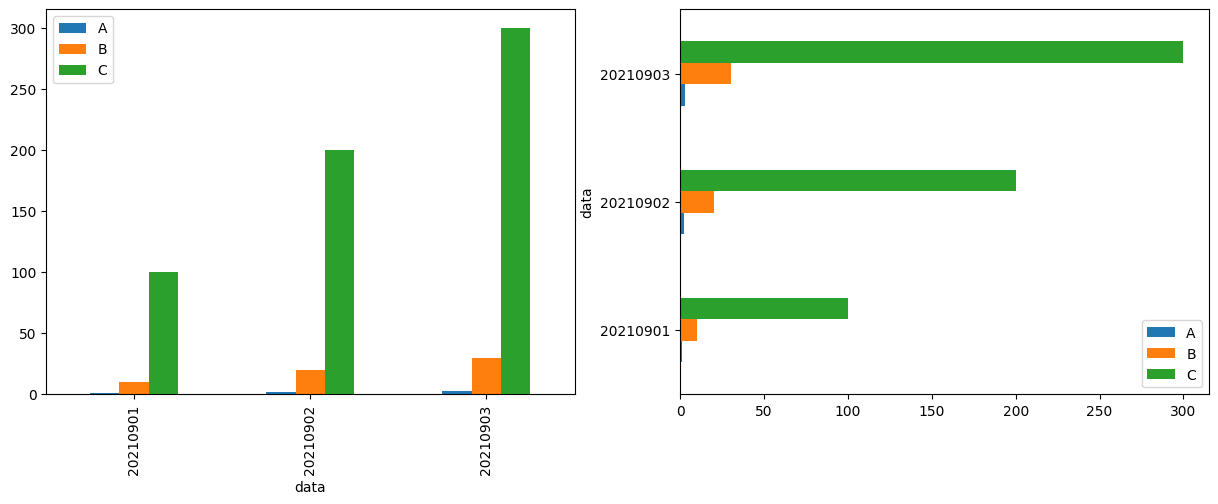

In [49]:
import matplotlib.pyplot as plt

fig , ax = plt.subplots(1,2,figsize =(15,5))
colors = ["deeppink" if v > 200 else "skyblue" for v in pivot1["C"]]
colors = ["deeppink" if v > 200 else "skyblue" for v in pivot1["C"]]
pivot1.plot(kind="bar",ax=ax[0])
pivot1.plot(kind="barh",ax=ax[1])
plt.show()

In [55]:
import pandas as pd
import numpy as np
df = pd.DataFrame({
    '지역':['안동','안동','안동','경기','경기','부산','서울','안동'],
    '요일':['월','월','수','월','화','월','목','금'],
    '강수확률':[80,70,90,10,20,30,40,80],
    '강수량':[80,50,100,200,200,100,50,1000]
})
df

,지역,요일,강수확률,강수량
0,안동,월,80,80
1,안동,월,70,50
2,안동,수,90,100
3,경기,월,10,200
4,경기,화,20,200
5,부산,월,30,100
6,서울,목,40,50
7,안동,금,80,1000


In [61]:
pd.pivot_table(df, index="요일",
                   columns="지역",
                   aggfunc="max" #같은 셀의 큰값을 고르는것/ sum -> 같은 셀의 합계 / mean -> 같은 셀의 평균
              ).fillna(" ") #NaN거르기

강수량                       강수확률                  
지역     경기     부산    서울      안동    경기    부산    서울    안동
요일                                                    
금                       1000.0                    80.0
목                 50.0                      40.0      
수                        100.0                    90.0
월   200.0  100.0          80.0  10.0  30.0        80.0
화   200.0                       20.0

# 데이터 시각화(Matplotlib)

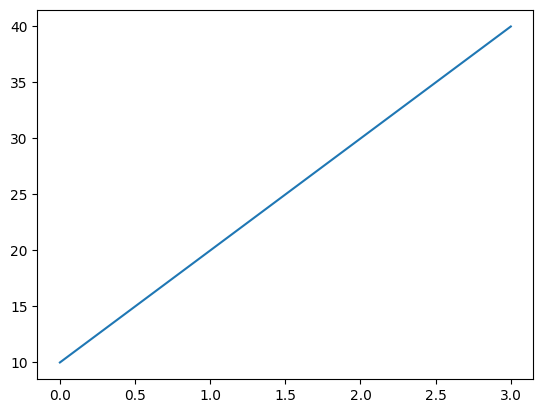

In [4]:
import matplotlib.pyplot as plt
plt.plot([10,20,30,40])
plt.show()

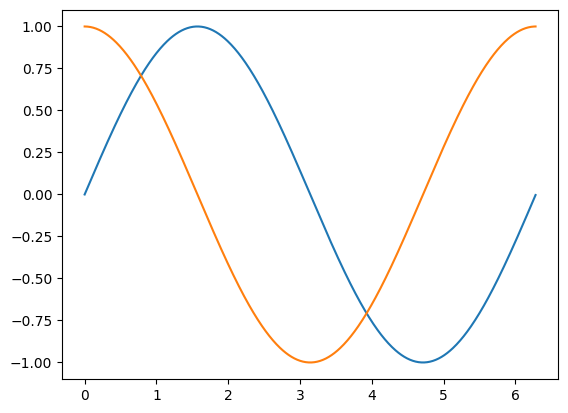

In [6]:
import numpy as np
x = np.arange(0,2*np.pi,0.01)
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.show()

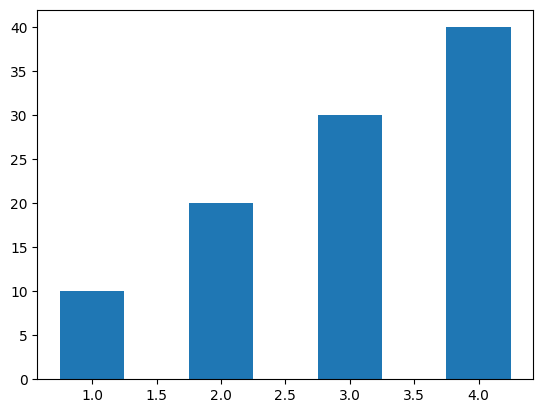

In [8]:
plt.bar([1,2,3,4],[10,20,30,40], width=0.5)
plt.show()

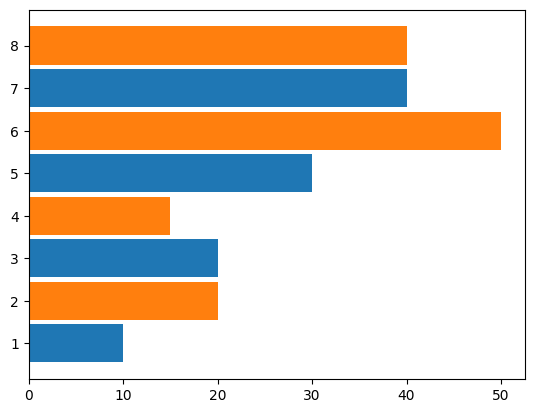

In [12]:
plt.barh(range(1,8,2),[10,20,30,40],height=0.9)
plt.barh(range(2,9,2),[20,15,50,40],height=0.9)
plt.show()

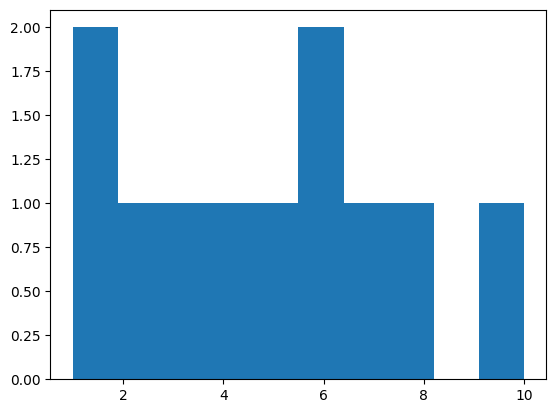

In [18]:
plt.hist([1,1,2,3,4,5,6,6,7,8,10],bins=10) #출현 빈도
plt.show()

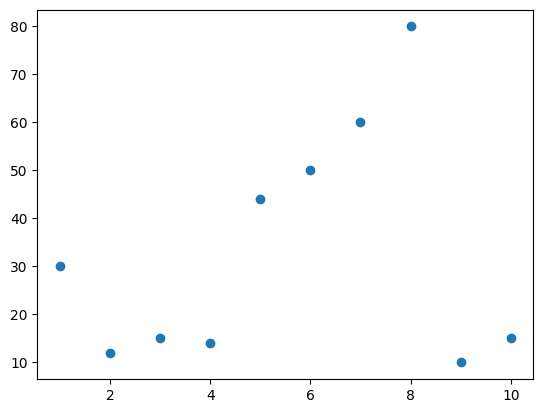

In [19]:
plt.scatter(range(1,11),[30,12,15,14,44,50,60,80,10,15]) #산점도
plt.show()

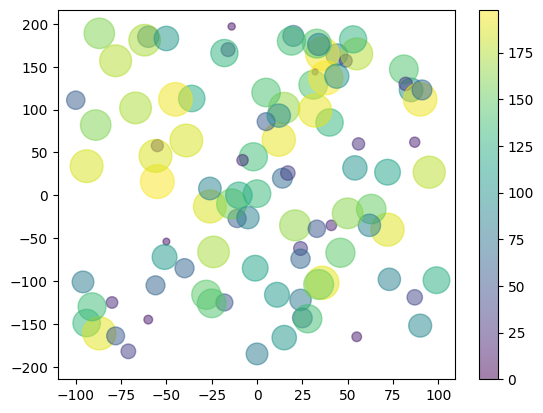

In [25]:
x = np.random.randint(-100,100,100) 
y = np.random.randint(-200,200,100)
z = np.random.randint(0,200,100)
#color = np.random.randint(0,100,100)
plt.scatter(x,y,s=z*3,c=z,alpha=0.5)
plt.colorbar()
plt.show()

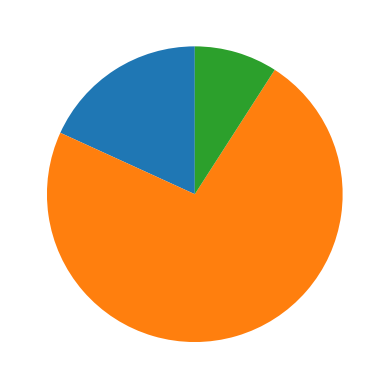

In [27]:
plt.pie([20,80,10],startangle=90)
plt.show()

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


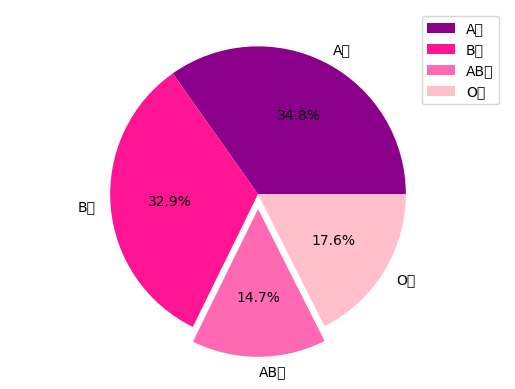

In [28]:
size = [2441,2312,1031,1233]
label = ['A형','B형','AB형','O형']
color = ['darkmagenta','deeppink','hotpink','pink']
plt.axis("equal")
plt.pie(size,labels = label,autopct = "%.1f%%",explode = (0,0,0.1,0),colors = color)

plt.legend()
plt.show()